![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [45]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


Which hour has the highest frequency of crimes?

12


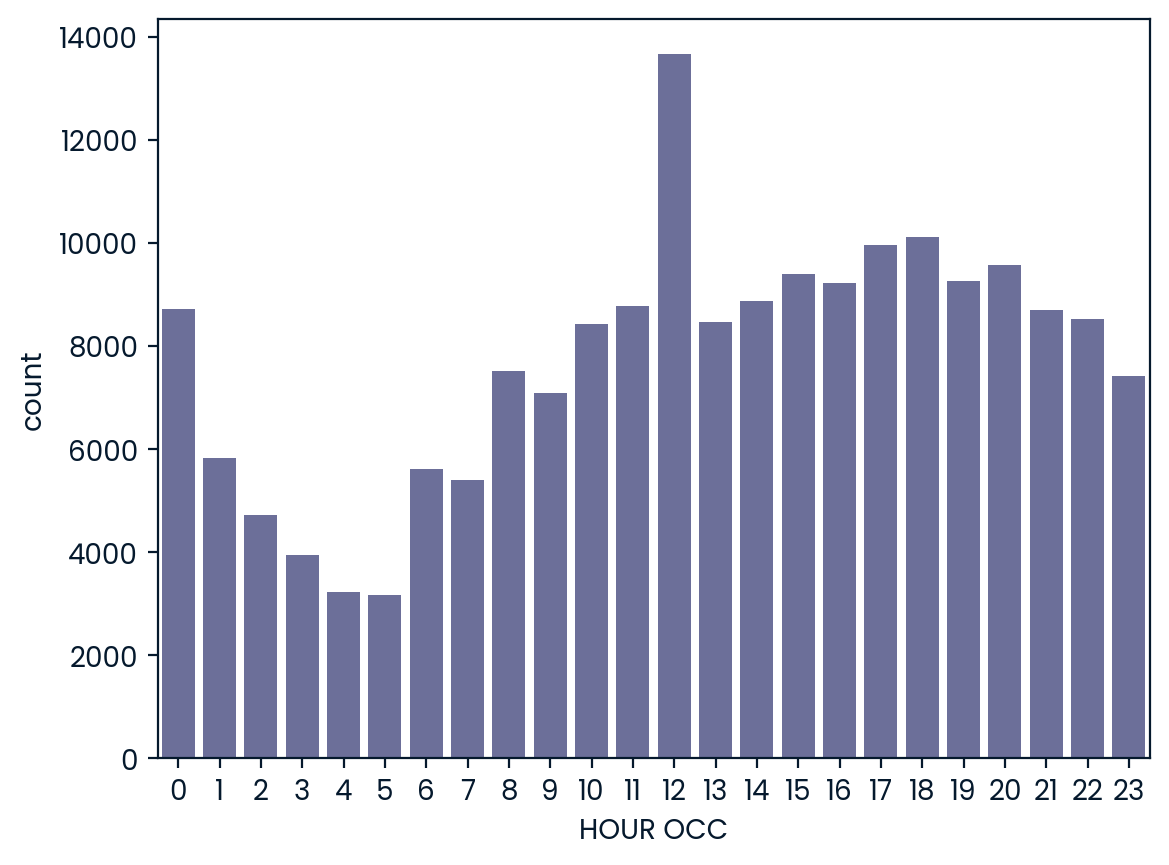

In [46]:
# Start coding here
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
peak_crime_hour = crimes['HOUR OCC'].value_counts().index[0]
print(peak_crime_hour)
# Use as many cells as you need
sns.countplot(data=crimes, x='HOUR OCC')
plt.show()

Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 

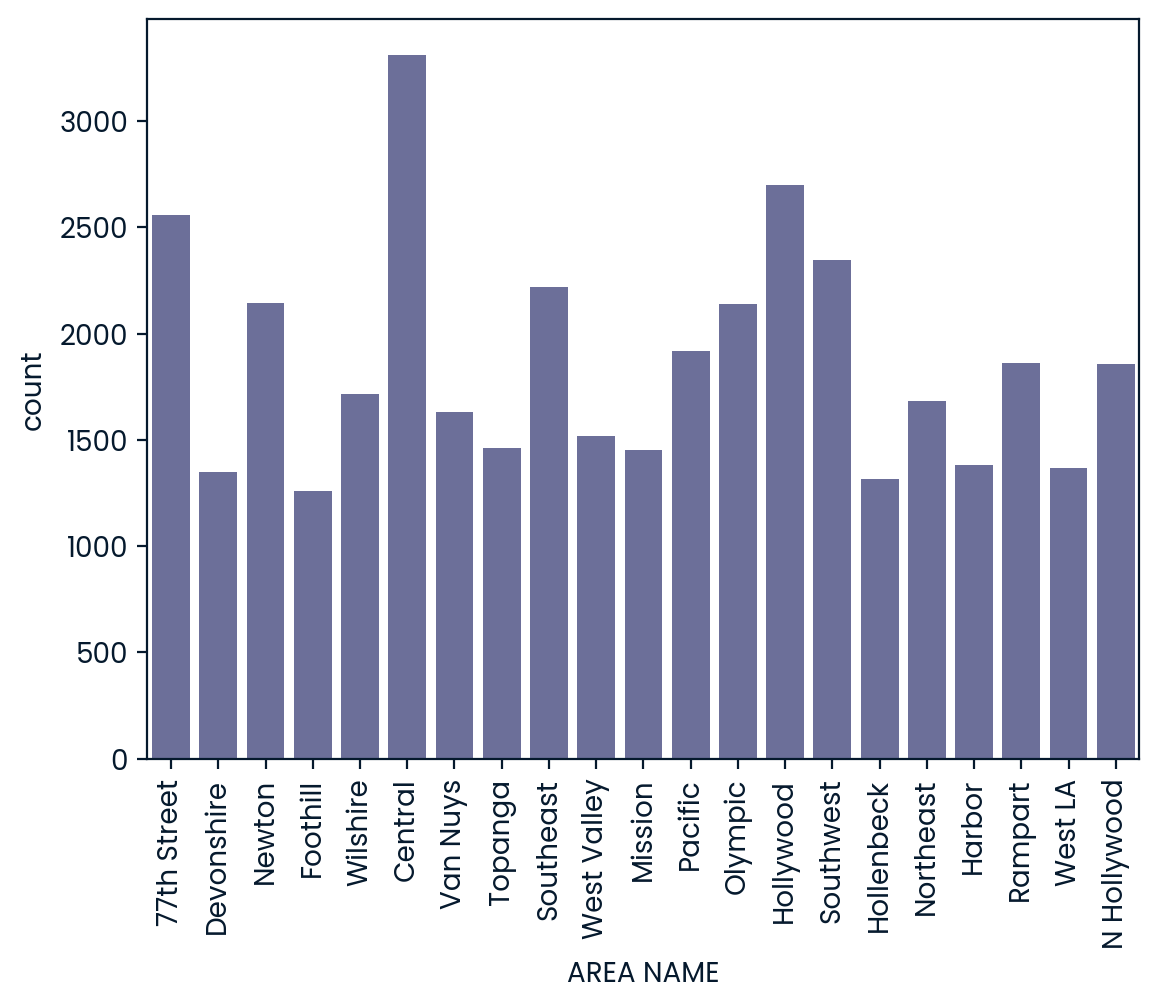

In [47]:
#modo 1: das 22 até as 4h 
area_night = crimes[(crimes['HOUR OCC'] >= 22) | (crimes['HOUR OCC'] < 4) ]
peak_night_crime_location = area_night['AREA NAME'].value_counts()
sns.countplot(data=area_night, x='AREA NAME')
plt.xticks(rotation = 90)
plt.show()

In [48]:
#modo 2: utilizando contains e np.select 

# expressão regular: Filtrando as linhas que começam com 22, 23, 00, 01, 02 ou 03 (^indica isso) e | é o bool ou
nigh = "^22|^23|^00|^01|^02|^03"
condition = [crimes['TIME OCC'].str.contains(nigh)]
crimes['NIGHT'] = np.select(condition, ['night'],'other')

In [49]:
crimes_night = crimes[crimes['NIGHT'] == 'night']
peak_night_crime_location  = crimes_night['AREA NAME'].value_counts().index[0]

In [50]:
#modo 2.1: utilizando groupby
crime_per_hour = crimes_night.groupby('AREA NAME')['TIME OCC'].agg('count')
crime_per_hour.sort_values(ascending=False)


AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
Wilshire       1716
Northeast      1684
Van Nuys       1629
West Valley    1520
Topanga        1461
Mission        1453
Harbor         1384
West LA        1369
Devonshire     1348
Hollenbeck     1315
Foothill       1260
Name: TIME OCC, dtype: int64

Identify the number of crimes committed against victims of different age groups.

In [51]:
bins_freq = [0,17,25,34,44,54,64,crimes['Vict Age'].max()]
categ = ['0-17','18-25','26-34','35-44','45-54','55-64','65+']
#len(categ) == len(bins)
crimes['victim_ages'] = pd.cut(crimes['Vict Age'],labels=categ,bins=bins_freq )

In [52]:
crimes['victim_ages'] = crimes['victim_ages'].astype(str)

In [53]:
crimes = crimes.rename(columns={'victim_ages': 'Age Range'})

In [54]:
victim_ages = crimes['Age Range'].value_counts()

In [55]:
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Range, dtype: int64

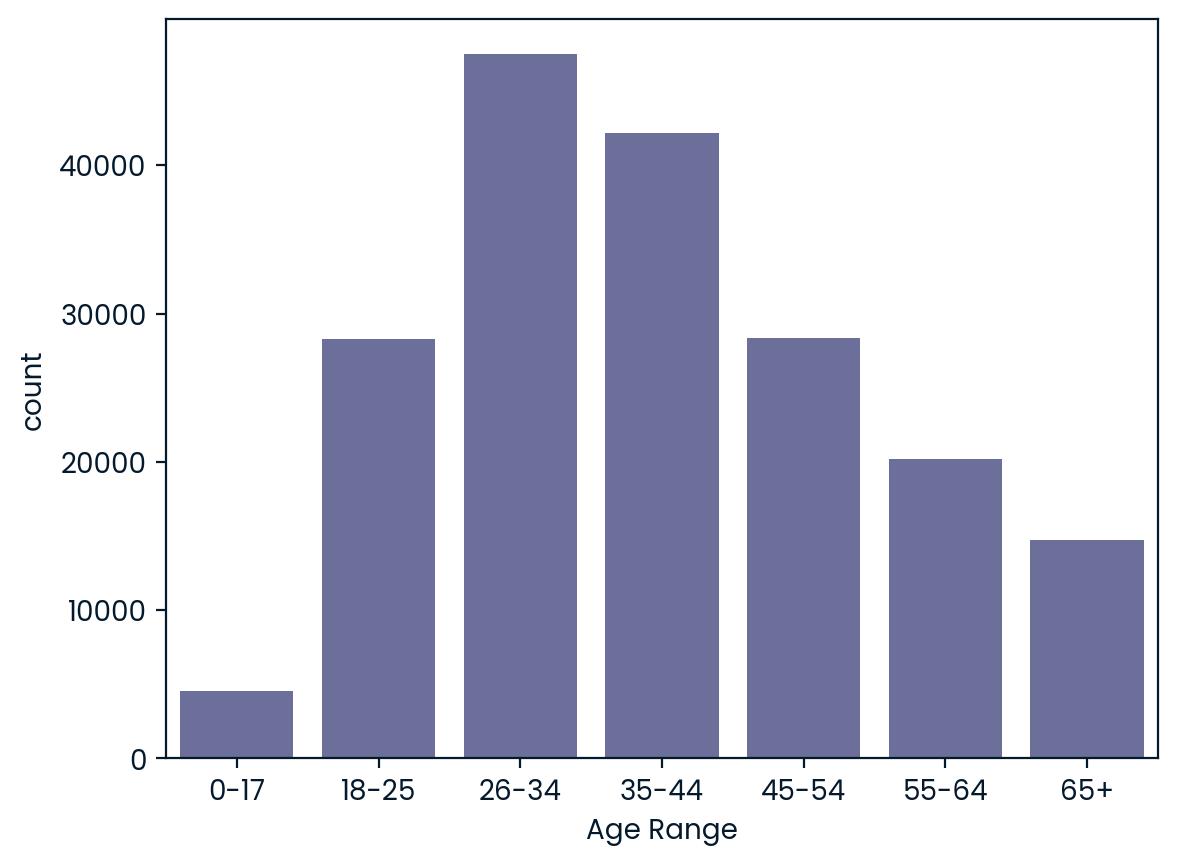

In [56]:
sns.countplot(data = crimes, x='Age Range',order=categ)
plt.show()